In [1]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
%matplotlib inline

/usr/share/python/yandex-ydf-toolbox/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

# Topics number dependency

In [3]:
def investigate(pickle_path, value='ums', fst_y_axis_name='Uniqueness measure', picture_path=None):
    with open(pickle_path, 'r') as f:
        d = pickle.load(f)

    def m_plot(val_name, err_name, normalize=False):
        val = np.array(d[val_name])
        err = np.array(d[err_name])

        if normalize:
            norm = np.max(val)
            val /= norm
            err /= norm

        plt.plot(d['topics_values'], val)
        plt.fill_between(d['topics_values'], val - err, val + err, alpha=0.5, facecolor='yellow')

    plt.figure(figsize=(12, 10))

    plt.subplot(211)
    plt.xlabel('Topics number')
    plt.ylabel(fst_y_axis_name)

    m_plot('avg_{}_values'.format(value), 'avg_{}_values_err'.format(value))
    m_plot('max_{}_values'.format(value), 'max_{}_values_err'.format(value))
    m_plot('min_{}_values'.format(value), 'min_{}_values_err'.format(value))

    plt.legend(['avg', 'max', 'min'], loc='lower right')
    plt.grid()

    plt.subplot(212)
    plt.xlabel('Topics number')
    plt.ylabel('Peplexity')

    m_plot('train_perplexity_values', 'train_perplexity_values_err')
    m_plot('test_perplexity_values', 'test_perplexity_values_err')

    plt.legend(['train', 'test'], loc='lower right')
    plt.grid()
    
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')

    plt.show()

/usr/share/python/yandex-ydf-toolbox/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


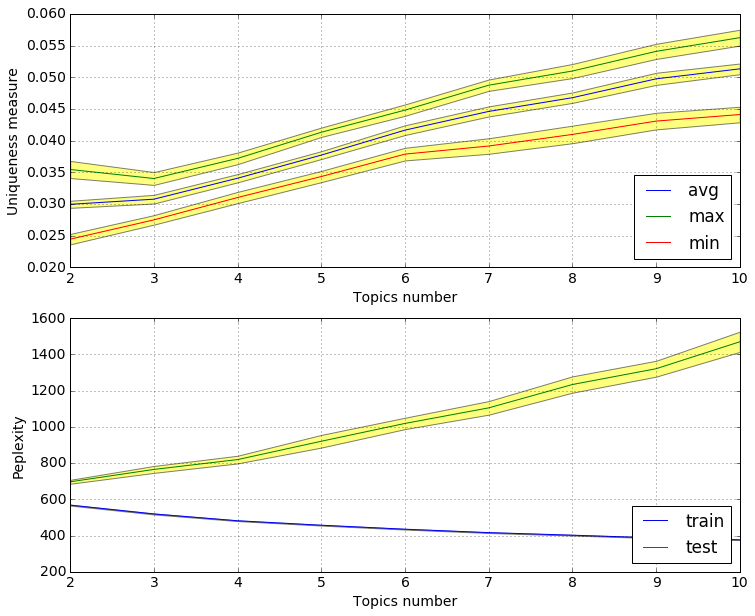

In [4]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_ums.eps'
)

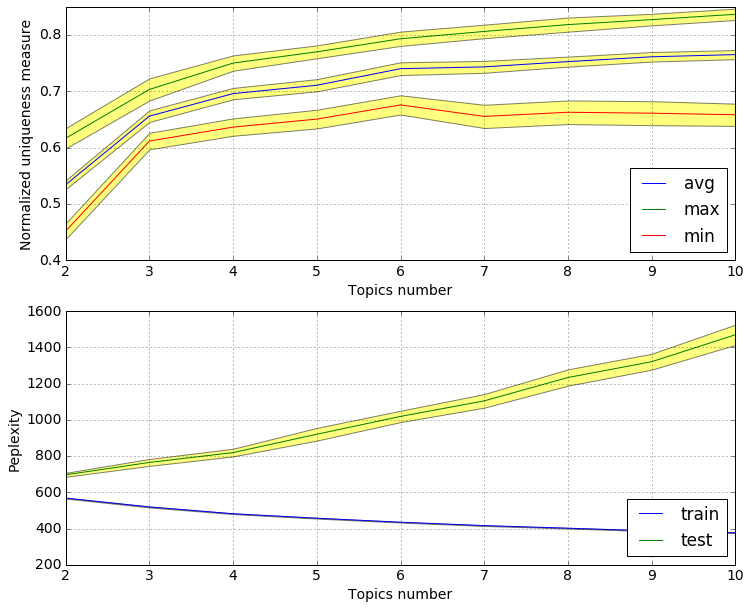

In [5]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_1.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_1_nums.eps'
)

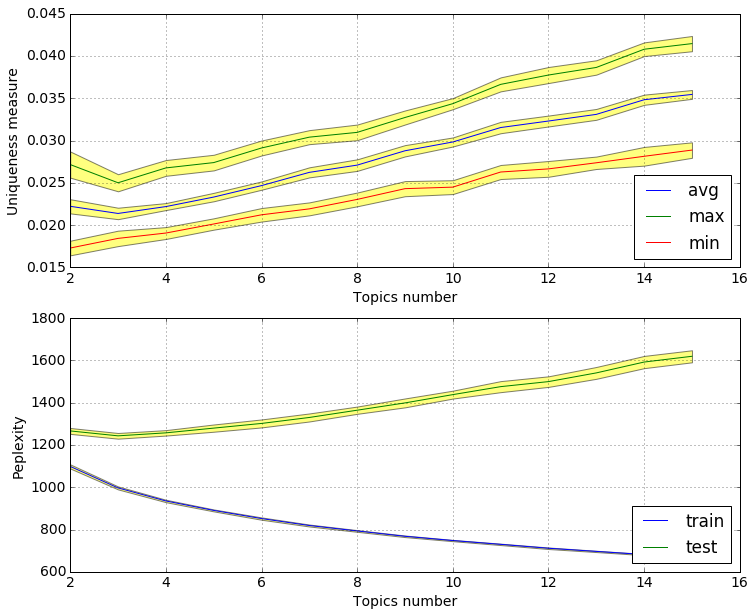

In [6]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_ums.eps'
)

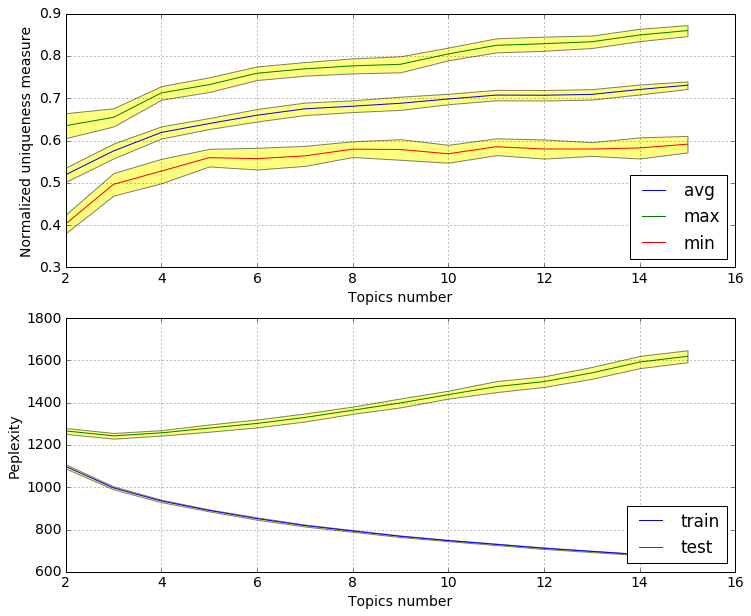

In [7]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_2.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_2_nums.eps'
)

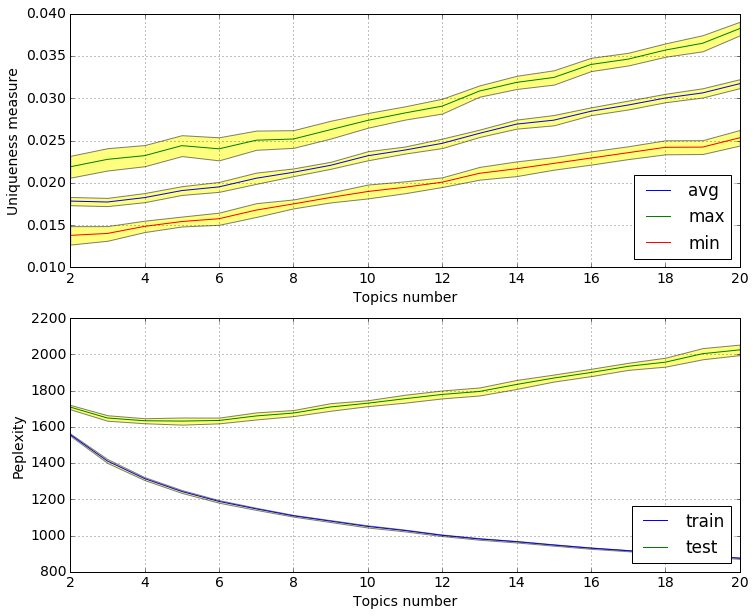

In [8]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_ums.eps'
)

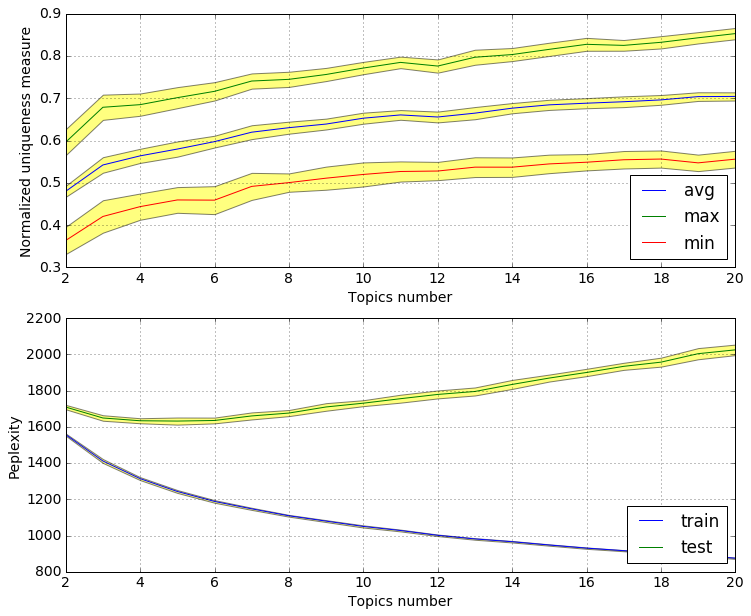

In [9]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_3.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_3_nums.eps'
)

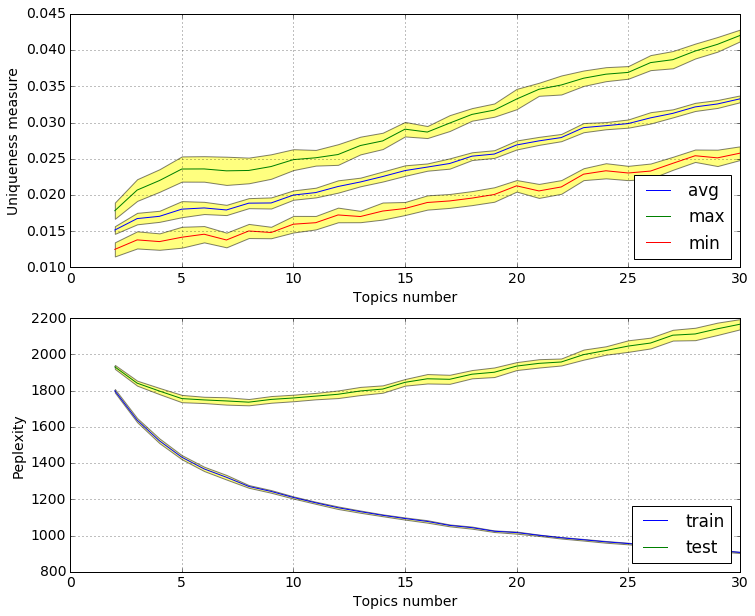

In [10]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_ums.eps'
)

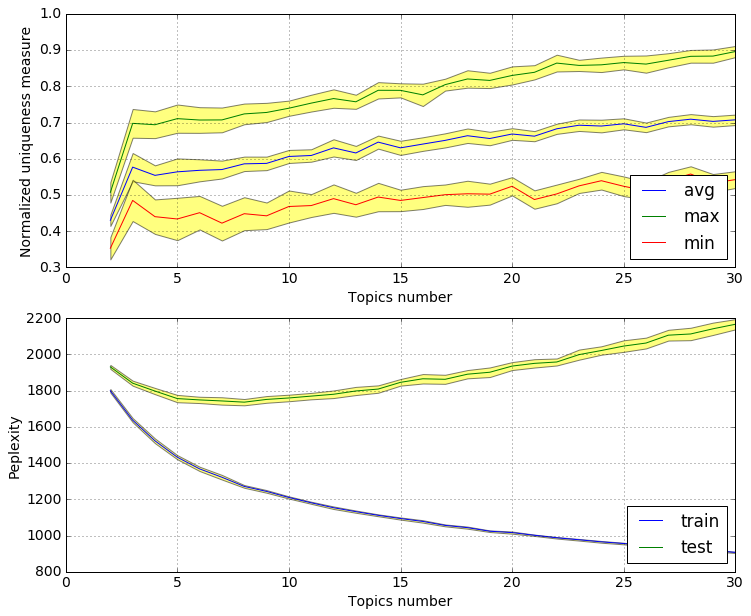

In [11]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_4.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_4_nums.eps'
)

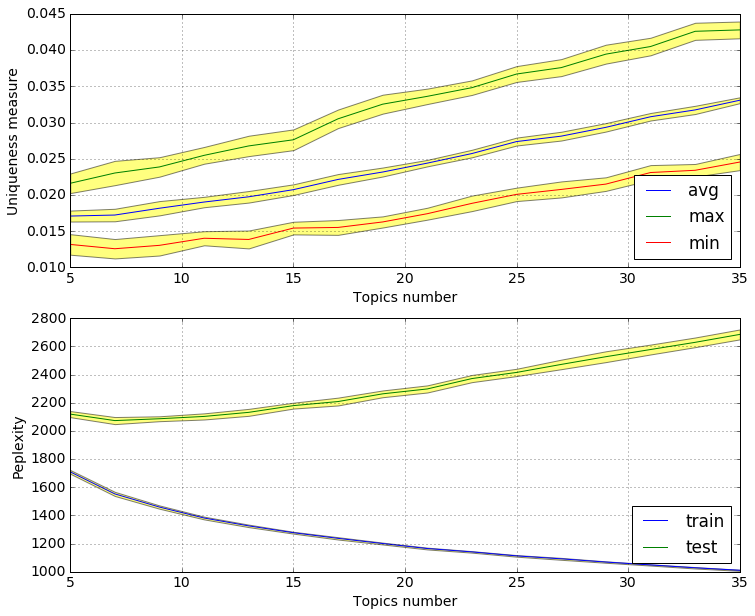

In [12]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='ums',
    fst_y_axis_name='Uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_ums.eps'
)

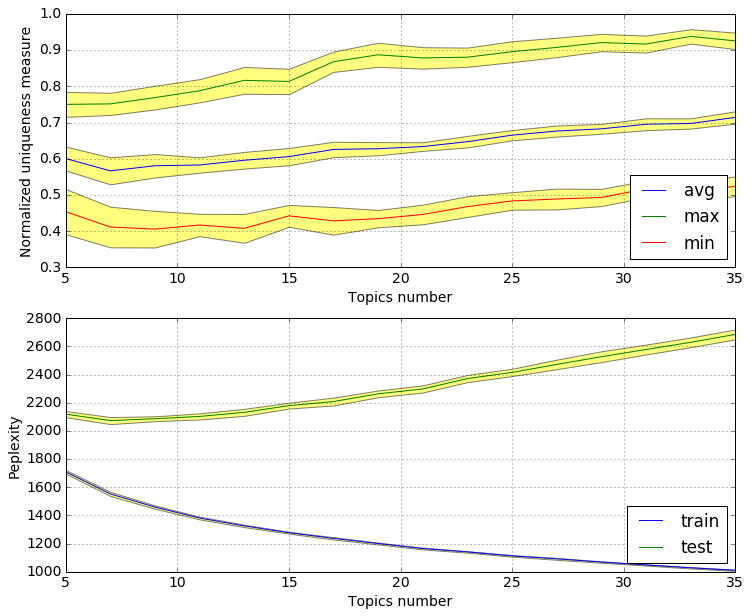

In [13]:
investigate(
    pickle_path='uniqueness_perp/topics_dependency_origin_big.pkl',
    value='nums',
    fst_y_axis_name='Normalized uniqueness measure',
    picture_path='uniqueness_perp/pictures/topics_dependency_origin_big_nums.eps'
)

# Sparsity dependency

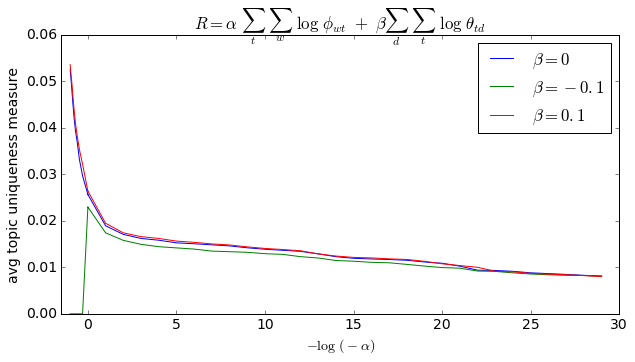

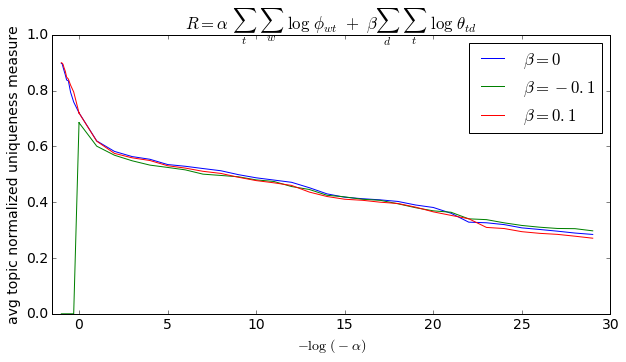

In [14]:
with open('uniqueness_perp/alpha_dependency_3.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_3_nums.eps', format='eps')
plt.show()

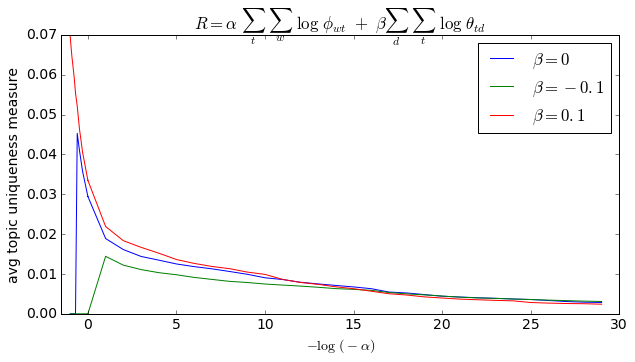

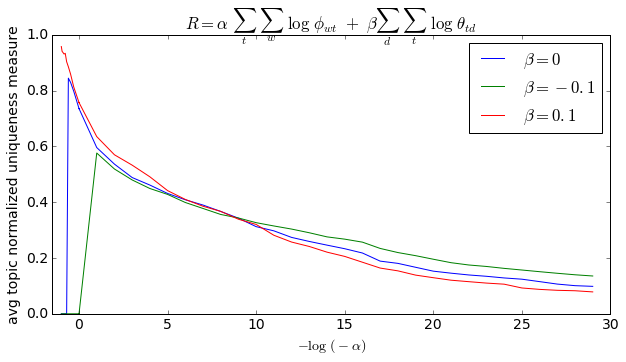

In [15]:
with open('uniqueness_perp/alpha_dependency_7.pkl', 'r') as f:
    d = pickle.load(f)
    
plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic uniqueness measure')
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_ums.eps', format='eps')
plt.show()


plt.figure(figsize=(10, 5))
plt.title('$R = \\alpha\\ \\sum_t\\ \\sum_w\\ \\log\\ \\phi_{wt}\\ +\\ \\beta \\sum_d\\ \\sum_t\\ \\log\\ \\theta_{td}$')
plt.xlabel('$- \\log\\ (- \\alpha)$')
plt.ylabel('avg topic normalized uniqueness measure')
plt.ylim(0, 1)
plt.xlim(-1.5, 30)
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures2'])
plt.plot(d['minus_log_alphas'], d['avg_normalized_uniqueness_measures3'])
plt.legend(['$\\beta = 0$', '$\\beta = -0.1$', '$\\beta = 0.1$'])
plt.savefig('uniqueness_perp/pictures/alpha_dependency_topics_origin_7_nums.eps', format='eps')
plt.show()

# Check uniqueness

In [16]:
font = {'family' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

In [17]:
def plot_tsne(phis, colors, perplexity, picture_path=None):
    model = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X = model.fit_transform(phis) 
    plt.figure(figsize=(10, 8))
    plt.xlim(0.95 * min(X[:, 0]), 1.05 * max(X[:, 0]))
    plt.ylim(0.95 * min(X[:, 1]), 1.05 * max(X[:, 1]))
    sc = plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.colorbar(sc)
    if picture_path is not None:
        plt.savefig(picture_path, format='eps')
    plt.show()

In [18]:
def investigate_matrix_variance(matrices, title_prefix=''):
    smapes = []
    maes = []
    for i in xrange(len(matrices)):
        for j in xrange(len(matrices)):
            if i < j:
                indices = (matrices[i] > 1e-20) | (matrices[j] > 1e-20)
                fst = matrices[i][indices]
                snd = matrices[j][indices]
                smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
                maes.append(np.mean(np.abs(fst - snd)))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(np.std(maes))
    plt.title(title_prefix + ' pairwise MAE distribution')
    plt.hist(maes, bins=50)
    plt.show()
    
    
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(np.std(smapes))
    plt.title(title_prefix + ' pairwise  sMAPE distribution')
    plt.hist(smapes, bins=50)
    plt.show()

In [19]:
def investigate_scalar_variance(values, title_prefix=''):
    plt.title(title_prefix + ' value distribution')
    plt.hist(values, bins=50)
    plt.show()
    
    smapes = []
    maes = []
    for i in xrange(len(values)):
        for j in xrange(len(values)):
            if i < j:
                fst = values[i]
                snd = values[j]
                smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
                maes.append(np.mean(np.abs(fst - snd)))
                
    print 'Average pairwise MAE: {}'.format(np.mean(maes))
    print 'Pairwise MAE std: {}'.format(np.std(maes))
    plt.title(title_prefix + ' pairwise MAE distribution')
    plt.hist(maes, bins=50)
    plt.show()
    
    
    print 'Average pairwise sMAPE: {}'.format(np.mean(smapes))
    print 'Pairwise sMAPE std: {}'.format(np.std(smapes))
    plt.title(title_prefix + ' pairwise sMAPE distribution')
    plt.hist(smapes, bins=50)
    plt.show()

In [20]:
def smape_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd)))

def mae_dist(a, b):
    indices = (a > 1e-20) | (b > 1e-20)
    fst = a[indices]
    snd = b[indices]
    return np.mean(np.abs(fst - snd))

def kl_dist(a, b):
    indices = (a > 1e-20)
    return np.sum(np.log(a[indices] / b[indices]) * a[indices])

def kl2_dist(a, b):
    c = (a + b) / 2.
    return kl_dist(a, c) + kl_dist(b, c)

def greed_match(fst, snd, dst_fun):
    T, W = fst.shape
    dists = []
    for t1 in xrange(T):
        dists.append(min(
            dst_fun(fst[t1, :], snd[t2, :])
            for t2 in xrange(T)
        ))
    return np.array(dists)

In [21]:
def check_phis(init_phi, phis, title_prefix=''):
    origin_phi = init_phi
    init_phi = init_phi.flatten()
    
    smapes = []
    maes = []
    greed_smapes = []
    greed_maes = []
    
    greed_kls = []
    greed_kl2s = []
    
    for phi in phis:
        indices = (phi > 1e-20) | (init_phi > 1e-20)
        fst = phi[indices]
        snd = init_phi[indices]
        smapes.append(np.mean(2. * np.abs(fst - snd) / (np.abs(fst) + np.abs(snd))))
        maes.append(np.mean(np.abs(fst - snd)))
        
        phi = phi.reshape(origin_phi.shape)
        greed_smapes.append(greed_match(origin_phi, phi, smape_dist).mean())
        greed_maes.append(greed_match(origin_phi, phi, mae_dist).mean())
        
        greed_kls.append(greed_match(origin_phi, phi, kl_dist).mean())
        greed_kl2s.append(greed_match(origin_phi, phi, kl2_dist).mean())
     
    print 'Average MAE: {}'.format(np.mean(maes))
    print 'MAE std: {}'.format(np.std(maes))
    print 'Min MAE: {}'.format(np.min(maes))
    print ''
    print 'Average sMAPE: {}'.format(np.mean(smapes))
    print 'sMAPE std: {}'.format(np.std(smapes))
    print 'Min sMAPE: {}'.format(np.min(smapes))
    print ''
    print 'Average greed MAE: {}'.format(np.mean(greed_maes))
    print 'greed MAE std: {}'.format(np.std(greed_maes))
    print 'Min greed MAE: {}'.format(np.min(greed_maes))
    print ''
    print 'Average greed sMAPE: {}'.format(np.mean(greed_smapes))
    print 'greed sMAPE std: {}'.format(np.std(greed_smapes))
    print 'Min greed sMAPE: {}'.format(np.min(greed_smapes))
    print ''
    print 'Average greed KL: {}'.format(np.mean(greed_kls))
    print 'greed KL std: {}'.format(np.std(greed_kls))
    print 'Min greed KL: {}'.format(np.min(greed_kls))
    print ''
    print 'Average greed KL2: {}'.format(np.mean(greed_kl2s))
    print 'greed KL2 std: {}'.format(np.std(greed_kl2s))
    print 'Min greed KL2: {}'.format(np.min(greed_kl2s))

In [22]:
with open('check_uniqueness/plsa.pkl', 'r') as f:
    d = pickle.load(f)

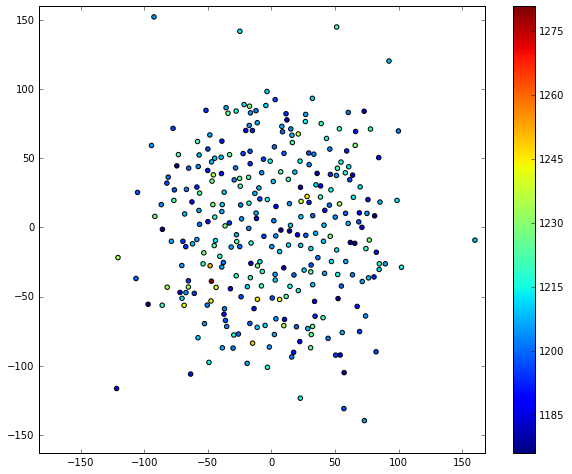

In [23]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/plsa.eps')

Average pairwise MAE: 0.0003661338166
Pairwise MAE std: 4.89041046372e-05


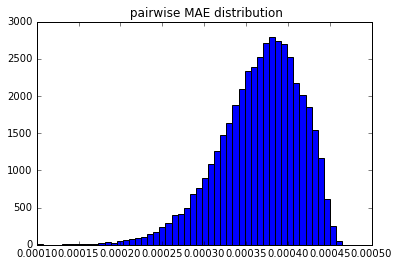

Average pairwise sMAPE: 1.42755996277
Pairwise sMAPE std: 0.0868067972605


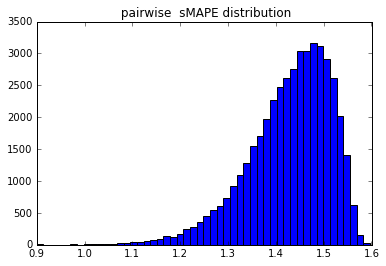

In [24]:
investigate_matrix_variance(d['phis'])

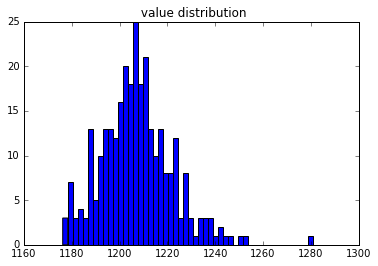

Average pairwise MAE: 16.3906936607
Pairwise MAE std: 13.2121522717


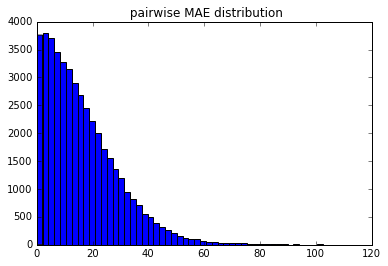

Average pairwise sMAPE: 0.0135569514053
Pairwise sMAPE std: 0.0108618998879


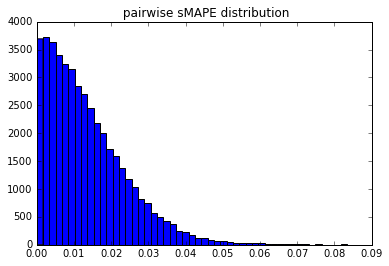

In [25]:
investigate_scalar_variance(d['perplexities'])

In [26]:
with open('check_uniqueness/full_initialized_plsa.pkl', 'r') as f:
    d = pickle.load(f)

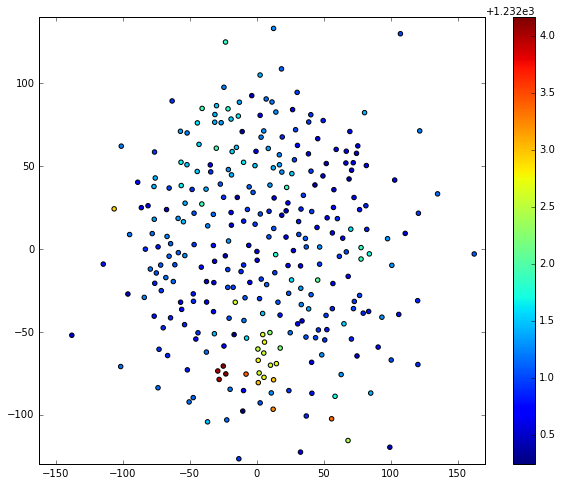

In [27]:
plot_tsne(d['phis'], d['perplexities'], 10, picture_path='check_uniqueness/pictures/full_initialized_plsa.eps')

Average pairwise MAE: 3.04983022772e-05
Pairwise MAE std: 1.58244974156e-05


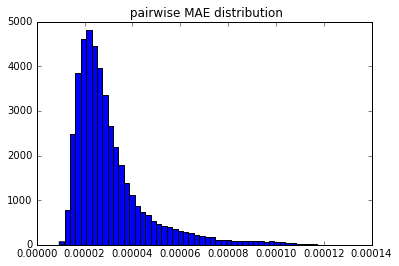

Average pairwise sMAPE: 0.119965929539
Pairwise sMAPE std: 0.0386538570706


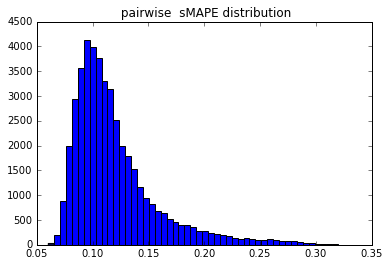

In [28]:
investigate_matrix_variance(d['phis'])

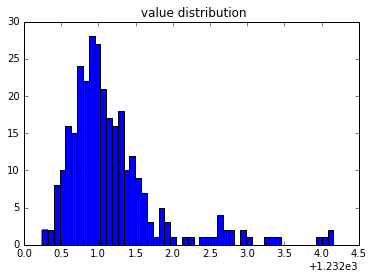

Average pairwise MAE: 0.622174853181
Pairwise MAE std: 0.663822505216


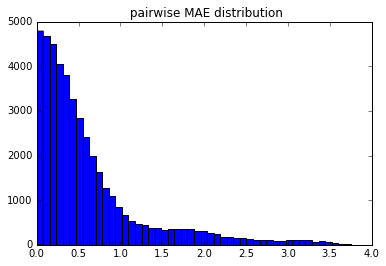

Average pairwise sMAPE: 0.000504389790148
Pairwise sMAPE std: 0.000537871932204


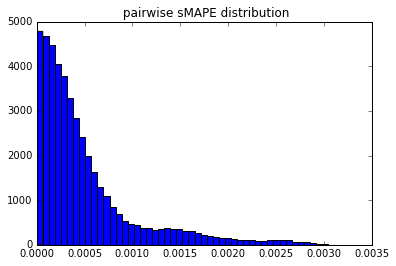

In [29]:
investigate_scalar_variance(d['perplexities'])

In [30]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 2.42686656876e-05
MAE std: 1.37457299727e-05
Min MAE: 3.6829164267e-07

Average sMAPE: 0.100480515665
sMAPE std: 0.0337657474276
Min sMAPE: 0.00197303621025

Average greed MAE: 2.43009974562e-05
greed MAE std: 1.37062216173e-05
Min greed MAE: 3.69524197675e-07

Average greed sMAPE: 0.100527634492
greed sMAPE std: 0.033663101798
Min greed sMAPE: 0.00198738060828

Average greed KL: 0.0163379491022
greed KL std: 0.0246968140592
Min greed KL: 1.89016364455e-06

Average greed KL2: 0.00359865879822
greed KL2 std: 0.00431117303734
Min greed KL2: 9.48603680947e-07


In [31]:
with open('check_uniqueness/syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

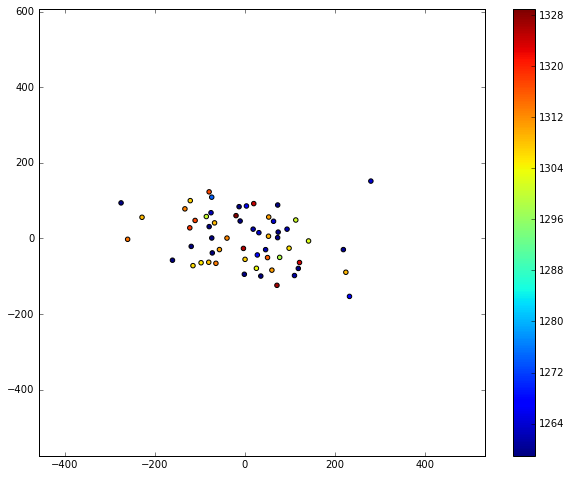

In [32]:
plot_tsne(d['phis'], d['perplexities'], 5, picture_path='check_uniqueness/pictures/syntetic_plsa.eps')

Average pairwise MAE: 0.000340158523286
Pairwise MAE std: 6.96715517677e-05


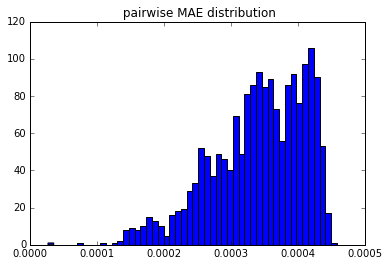

Average pairwise sMAPE: 1.44804474691
Pairwise sMAPE std: 0.137223786469


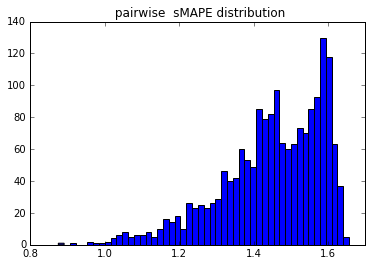

In [33]:
investigate_matrix_variance(d['phis'])

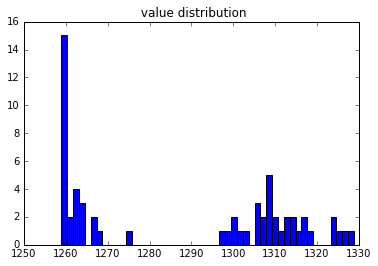

Average pairwise MAE: 28.4895921814
Pairwise MAE std: 22.687267039


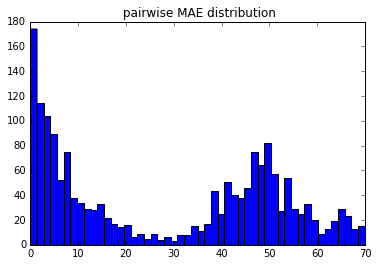

Average pairwise sMAPE: 0.0221068497442
Pairwise sMAPE std: 0.0176217361678


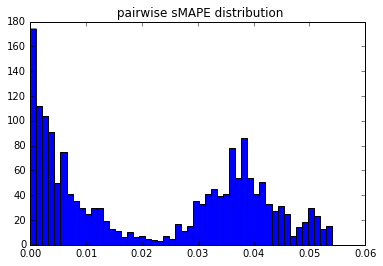

In [34]:
investigate_scalar_variance(d['perplexities'])

In [35]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 0.000335245193169
MAE std: 8.33153407693e-05
Min MAE: 2.42179129002e-06

Average sMAPE: 1.51994937677
sMAPE std: 0.138245209371
Min sMAPE: 0.941828250178

Average greed MAE: 6.69548260868e-05
greed MAE std: 4.91642878221e-05
Min greed MAE: 2.39933778687e-06

Average greed sMAPE: 1.07009769808
greed sMAPE std: 0.0874209358061
Min greed sMAPE: 0.941141398119

Average greed KL: 0.13438780093
greed KL std: 0.10827541069
Min greed KL: 0.00231768062541

Average greed KL2: 0.0696779223491
greed KL2 std: 0.0554514259186
Min greed KL2: 0.00157467657983


In [36]:
with open('check_uniqueness/full_initialized_syntetic_plsa.pkl', 'r') as f:
    d = pickle.load(f)

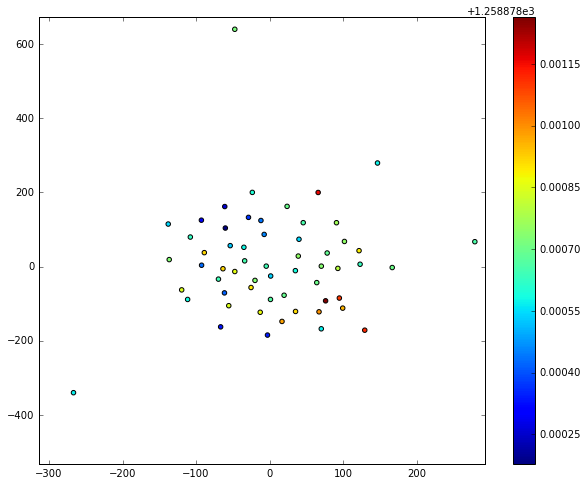

In [37]:
plot_tsne(d['phis'], d['perplexities'], 5, picture_path='check_uniqueness/pictures/full_initialized_syntetic_plsa.eps')

Average pairwise MAE: 3.92967396326e-08
Pairwise MAE std: 1.66635996114e-08


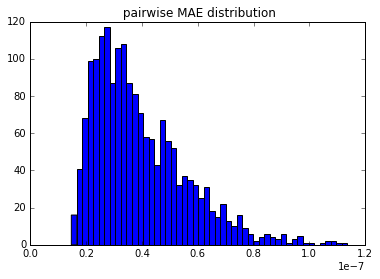

Average pairwise sMAPE: 0.00110587223855
Pairwise sMAPE std: 0.000226452079508


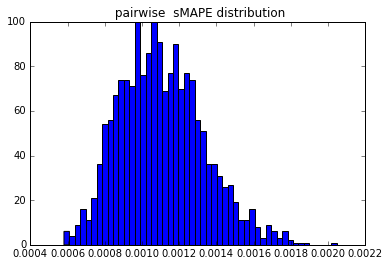

In [38]:
investigate_matrix_variance(d['phis'])

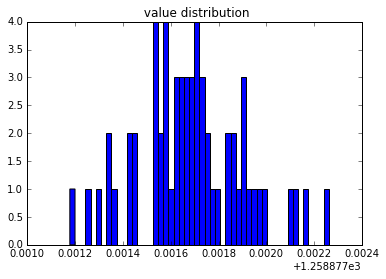

Average pairwise MAE: 0.000250564704114
Pairwise MAE std: 0.000191276764139


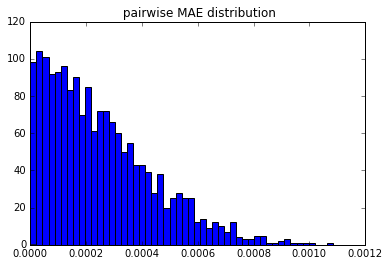

Average pairwise sMAPE: 1.99038004782e-07
Pairwise sMAPE std: 1.51942169431e-07


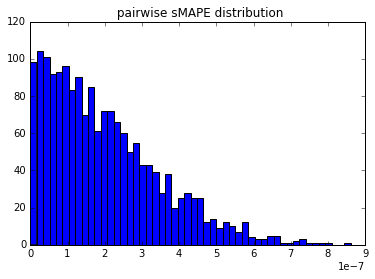

In [39]:
investigate_scalar_variance(d['perplexities'])

In [40]:
check_phis(d['init_phi'], d['phis'])

Average MAE: 4.43454392411e-07
MAE std: 2.11210200235e-08
Min MAE: 3.9660498309e-07

Average sMAPE: 0.00775845184469
sMAPE std: 0.000142191182039
Min sMAPE: 0.00748671616445

Average greed MAE: 4.65832321545e-07
greed MAE std: 2.22939833176e-08
Min greed MAE: 4.16423019806e-07

Average greed sMAPE: 0.00798646928908
greed sMAPE std: 0.000144202773042
Min greed sMAPE: 0.00770431283342

Average greed KL: 6.61848936323e-05
greed KL std: 4.55126077216e-06
Min greed KL: 5.18348617689e-05

Average greed KL2: 4.11583989182e-05
greed KL2 std: 2.94187404537e-06
Min greed KL2: 3.13474527203e-05
